# A Comprehensive Data Analysis on a WhatsApp Group Chat
##### Author: [Oliver Samwel](https://x.com/Oliv3r_Sami)

## *Overview*

- Introduction
- Data Retrieval & Preprocessing 
- Exploratory Data Analysis
- Data Visualization 
- Data Interpretation
- Summarizing the Inferences
- Conclusion

# Introduction:

WhatsApp has swiftly risen to the top of the global text and voice messaging market.  With more than 1.5 billion monthly active users and a focus on cross-platform communications, it is the most widely used mobile chat program globally.


- I considered a number of projects that would allow me to analyze data, such as The cliched Covid-19 Data Analysis or the Nairobi Air Quality Index.

- However, I reasoned that I could do Data Analysis on a WhatsApp group chat of university students and learn fascinating things like who is most active, who are ghosts (those who don't respond), my sleep schedule, the most used emoji, the sentiment score of each individual, who swears the most, the most active times of the day, or does the group use phones during university classroom hours? 

- Since the individuals in this talk are people I know personally, these would undoubtedly be some fascinating insights, more for me than for you.


## Beginning. How do I export my conversations? From Where To Obtain Data?

- The first step is **Data Retrieval & Preprocessing**, that is to **gather the data**. WhatsApp allows you to **export your chats** through a **.txt format**. 

- Go to the respective chat, which you want to export!

<img src="assets/images/WhatsApp1.jpeg" alt="Export Chat Step" style="width: 200px; height:200px, auto;">

- Tap on **options**, click on **More**, and **Export Chat.**

<img src="assets/images/WhatsApp2.jpeg" alt="Export Chat Step" style="width: 200px; height:200px, auto;">

- I will be Exporting **Without Media.**

<img src="assets/images/WhatsApp3.jpeg" alt="Export Chat Step" style="width: 200px; height:200px, auto;">

## Opening this .txt file up, you get messages in a format that looks like this:

<img src="assets/images/image4.png" alt="Export Chat Step" style="width: 600px; height:600px, auto;">


# *Importing Necessary Libraries*

We will be using :
1. **Regex (re)** to extract and manipulate strings based on specific patterns.
    - References:
        - [Regex - Python Docs](https://docs.python.org/3/library/re.html)
        - [Regex cheatsheet](https://www.rexegg.com/regex-quickstart.html)
        - [Regex Test - live](https://regexr.com/)
        - [Datetime Format](http://strftime.org/)
2. **pandas** for analysis.
3. **matlotlib** and **seaborn** for visualization.
4. **emoji** to deal with emojis.
    - References:
        - [Python Docs](https://pypi.org/project/emoji/)
        - [Emoji](https://github.com/carpedm20/emoji)
        - [EMOJI CHEAT SHEET](https://www.webfx.com/tools/emoji-cheat-sheet/)
5. **wordcloud** for the most used words.

In [6]:
import re
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
import itertools
from collections import Counter
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

##### NOTE: 

- This special command `%matplotlib inline` to ensure that plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows.
- `warnings.filterwarnings('ignore')`: The warnings filter controls whether warnings are ignored, displayed, or turned into errors (raising an exception). [REFERENCE](https://docs.python.org/3/library/warnings.html)

## *Preparation and reading data*

In [9]:
import pandas as pd
import re

def rawToDf(file, key):
    '''Convert raw .txt file into a DataFrame'''

    split_formats = {
        '12hr': r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr': r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom': ''
    }
    
    datetime_formats = {
        '12hr': '%m/%d/%y, %I:%M %p -',
        '24hr': '%m/%d/%y, %H:%M -',
        'custom': ''
    }

    with open(file, 'r', encoding='utf-8') as raw_data:
        raw_string = ' '.join(raw_data.read().split('\n'))
        user_msg = re.split(split_formats[key], raw_string)[1:]
        date_time = re.findall(split_formats[key], raw_string)

        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg})

    # Strip whitespace from date_time
    df['date_time'] = df['date_time'].str.strip()
    
    # Convert date_time to datetime with error handling
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key], errors='coerce')

    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split(r'([\w\W]+?):\s', i)
        if a[1:]:
            usernames.append(a[1])
            msgs.append(a[2])
        else:
            usernames.append("group_notification")
            msgs.append(a[0])

    df['user'] = usernames
    df['message'] = msgs

    df.drop('user_msg', axis=1, inplace=True)

    return df

#### *NOTE*:

- Since WhatsApp texts are *multi-line*, you cannot just read the file line by line and get each message that you want. Instead, you need a way to *identify* if a line is a new message or part of an old message. You could use regular expressions.
- While reading each line, I split it based on a comma and take the first item returned from the `split()` function. If the line is a new message, the first item would be a valid date, and it will be appended as a new message to the list of messages. If it’s not, the message is part of the previous message, and hence, will be appended to the end of the previous message as one continuous message.

In [11]:
df = rawToDf('WhatsApp Chat with Software Dev SEP 2021 2.2.txt', '12hr')

## *Prior Information of my Whatsapp Data*
- This is my most active university Software Development group.
- It has **140+** participants; 145 to be precise.
- This group was made in **September 13th 2021, 11:18 AM.**

## Pre-Processing

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5138 entries, 0 to 5137
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  5138 non-null   datetime64[ns]
 1   user       5138 non-null   object        
 2   message    5138 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 120.6+ KB


### The dataset contains 3 rows, and 5138 respective entries.
- Here is how it looks like:

In [16]:
df.sample(20)

,date_time,user,message
3643,2024-01-26 21:04:00,jeff,group links ni kitu ya kugatekeep kweli?
2849,2023-10-16 22:59:00,+254 713 559966,2GB kwani ni calculator?
2968,2023-10-19 10:11:00,Rep group A,This message was deleted
1031,2023-03-07 00:13:00,+254 704 776866,Hyo lec ni taliban..🥲
4397,2024-09-09 13:02:00,+254 724 530370,<Media omitted>
625,2023-02-17 20:20:00,+254 758 685974,@254707265704
1960,2023-05-10 22:58:00,+254 704 776866,It's sarcasm 🫴😂
4512,2024-09-17 12:32:00,+254 111 218841,Monthly Acha ikue per semester hio 100
1393,2023-03-16 10:20:00,+254 720 509324,Bana😂
646,2023-02-19 21:41:00,+254 707 265704,Need two members for Object oriented programming


### An important observation

- One might wonder there are no NaNs, but as you can see, there are some rows, where messages are an *empty string.*
- This can be because, the message might just contain **emojis.**
#### To see, how many such rows are there, we can use `df[df['message'] == ""].shape[0]`

In [18]:
df[df['message'] == ""].shape[0]

256

### Adding extra *helper columns for analysis and visualization*

In [20]:
df['day'] = df['date_time'].dt.strftime('%a')
df['month'] = df['date_time'].dt.strftime('%b')
df['year'] = df['date_time'].dt.year
df['date'] = df['date_time'].apply(lambda x: x.date())

# Now that we have a clean DataFrame to work with, it’s time to perform analysis on it.

### Final Data Frame

In [22]:
df

,date_time,user,message,day,month,year,date
0,2023-02-06 19:44:00,group_notification,Messages and calls are end-to-end encrypted. N...,Mon,Feb,2023,2023-02-06
1,2021-09-13 11:18:00,group_notification,"~ Twiri created group ""Software Dev SEP 2021 2...",Mon,Sep,2021,2021-09-13
2,2023-02-06 19:41:00,group_notification,~ Twiri added you,Mon,Feb,2023,2023-02-06
3,2023-02-06 19:53:00,+254 797 768266,Twiri confirm class ya kesho,Mon,Feb,2023,2023-02-06
4,2023-02-06 20:22:00,+254 774 347319,<Media omitted>,Mon,Feb,2023,2023-02-06
...,...,...,...,...,...,...,...
5133,2025-03-05 11:05:00,Sami,DA lab,Wed,Mar,2025,2025-03-05
5134,2025-03-05 16:40:00,+254 745 508841,<Media omitted>,Wed,Mar,2025,2025-03-05
5135,2025-03-05 19:53:00,+254 703 138300,<Media omitted>,Wed,Mar,2025,2025-03-05
5136,2025-03-05 21:17:00,Sami,<Media omitted>,Wed,Mar,2025,2025-03-05


# Data Analysis

**1. Overall frequency of total messages on the group.**

**2. Top 10 most active days.**

**3. Top 10 active users on the group (with a twist).**
- Ghosts present in the group. (shocking results.)

**4. Top 10 users most sent media.**

**5. Top 10 most used emojis.**

**6. Most active hours and days.**
 - Heatmaps of weekdays and months.
 - Most active hours, weekdays, and months.

**7. Most used words - WordCloud**

# 1. Overall frequency of total messages on the group.

- I will first do this to get a look at overall data.

I will plot a simple line graph to see the frequency of messages over the months.

##### I expect to see a nice line graph with crests and troughs in odd places.

In [25]:
df1 = df.copy() # I will be using a copy of the original data frame everytime, to avoid loss of data!
df1['message_count'] = [1] * df1.shape[0]  # adding extra helper column --> message_count.
df1.drop(columns='year', inplace=True)  # dropping unnecessary columns, using `inplace=True`, since this is copy of the DF and won't affect the original DataFrame.
df1 = df1.groupby('date').sum(numeric_only=True).reset_index() # grouping by date; since plot is of frequency of messages --> no. of messages / day.
df1


,date,message_count
0,2021-09-13,1
1,2023-02-06,11
2,2023-02-07,4
3,2023-02-08,31
4,2023-02-09,96
...,...,...
465,2025-03-01,2
466,2025-03-03,4
467,2025-03-04,9
468,2025-03-05,9


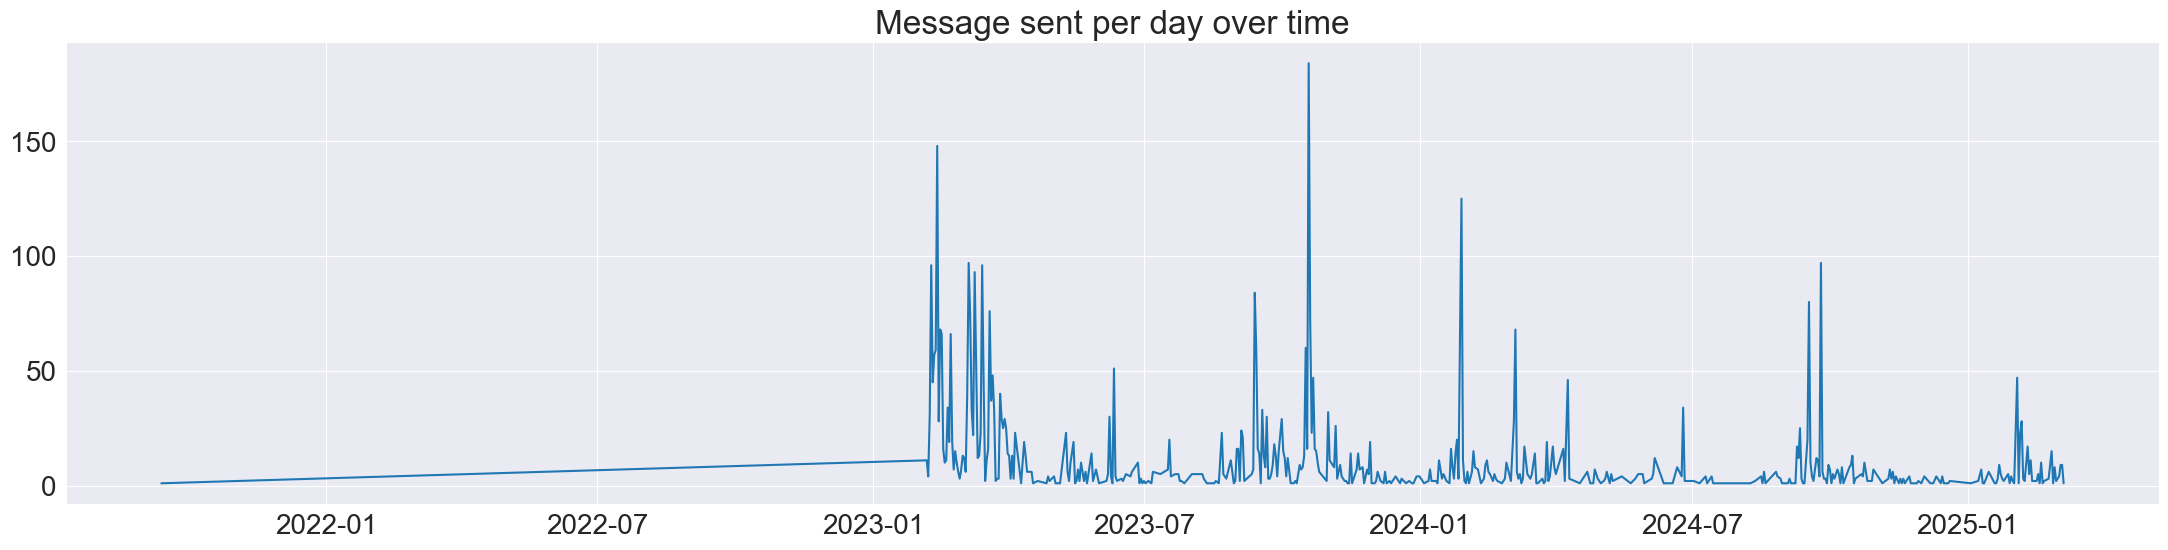

In [26]:
# Improving Default Styles Using Seaborn
sns.set_style("darkgrid")

# For better readability;
import matplotlib
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (27, 6) # Same as `plt.figure(figsize = (27, 6))`


# A basic plot
plt.plot(df1.date, df1.message_count)
plt.title('Message sent per day over time');
plt.show()

# Saving the plots
plt.savefig('msg_plots.svg', format = 'svg')

# 2 Top 10 most active days.

In [28]:
top10days = df1.sort_values(by="message_count", ascending=False).head(10)  # Sort values according to the number of messages per day.
top10days.reset_index(inplace=True)           # reset index in order.
top10days.drop(columns="index", inplace=True) # dropping original indices.
top10days

,date,message_count
0,2023-10-19,184
1,2023-02-13,148
2,2024-01-29,125
3,2023-03-06,97
4,2024-09-25,97
5,2023-03-15,96
6,2023-02-09,96
7,2023-03-10,93
8,2023-09-13,84
9,2024-09-17,80


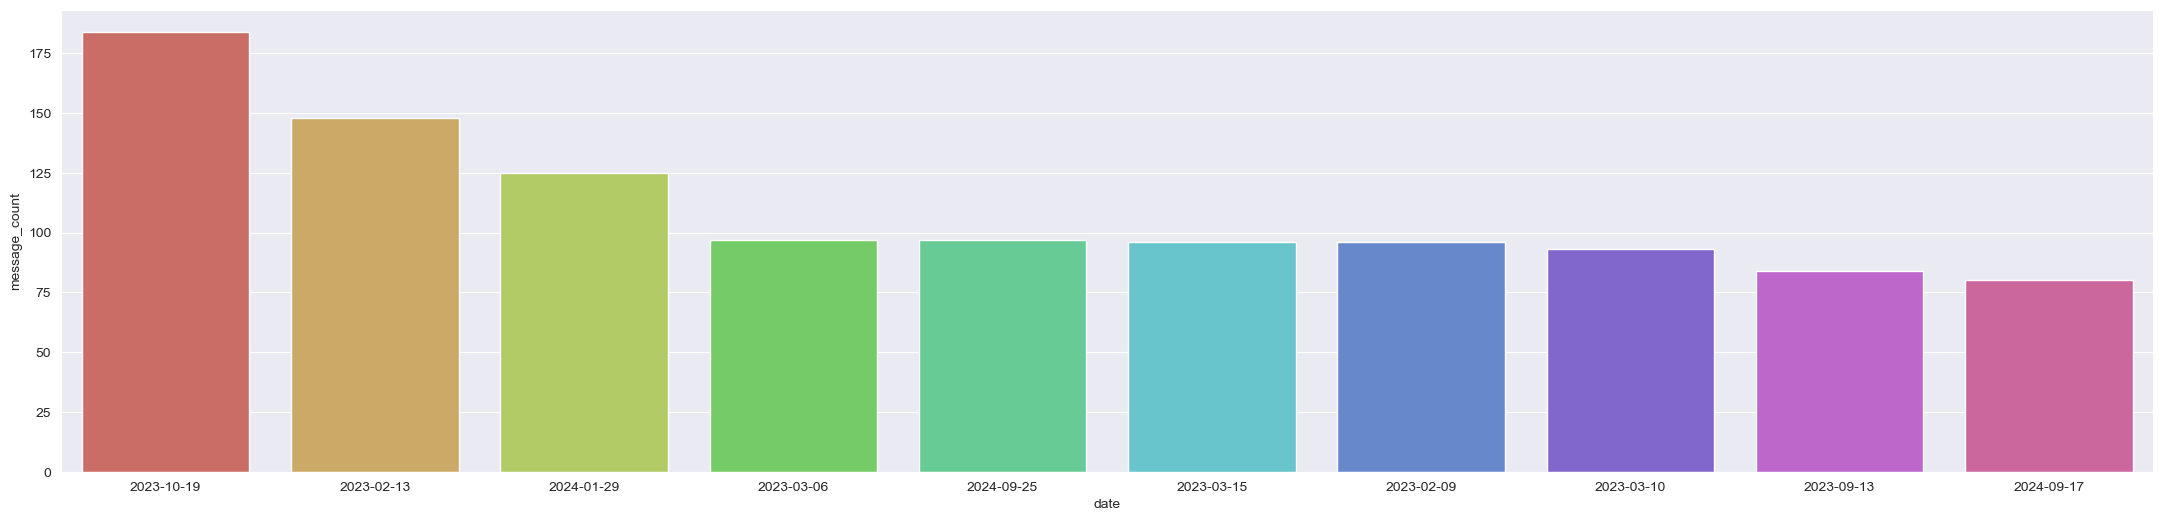

In [29]:
# Improving Default Styles using Seaborn
sns.set_style("darkgrid")

# For better readability
import matplotlib
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (12, 8)

# A bar plot for top days
sns.barplot(x='date', y='message_count', data=top10days, palette="hls");
plt.show()

# Saving the plots
plt.savefig('top10_days.svg', format= 'svg')

#### Apparently, the group was very active on 19th October'23

- I'll have to check this that we were discussing!

# 3. Top 10 active users on the group.

### Before, analysing that, we will see the number of Ghosts in the group.

In [33]:
# Total number of people who have sent at least one message on the group
print(f"Total number of people who have sent at least one message on the group are {len(df.user.unique()) - 1}")  # `-1` because excluding "group_notficiation"
print(f"Number of people who haven't sent even a single message on the group are {145 - len(df.user.unique()) - 1}")

Total number of people who have sent at least one message on the group are 178
Number of people who haven't sent even a single message on the group are -35


### *Shocking Result*
- Total number of people who have sent at least one message on the group are **178**.
- BUT, the total number of participants were **145**. This is beacuse the had had members joining others leaving along the way.
- **That means -35 people in the group have not sent even a single message throughout these 9 months and 5138 messages.** Recheck this! 

## Now, pre-processing top 10 active users.

In [36]:
df2 = df.copy()
df2 = df2[df2.user != "group_notification"]
top10df = df2.groupby("user")["message"].count().sort_values(ascending=False)

# Final DataFrame
top10df = top10df.head(10).reset_index()
top10df

,user,message
0,+254 704 776866,384
1,+254 713 559966,363
2,+254 794 625960,279
3,+254 111 218841,266
4,Sami,256
5,+254 701 970415,178
6,+254 111 439103,175
7,+254 758 685974,137
8,+254 797 768266,128
9,+254 718 153843,125


## Now, visualizing top 10 active users.
### Replacing names with initials for better visualization

In [38]:
# Initialize the 'initials' column
top10df['initials'] = ''

# Iterate up to the minimum of 10 or the length of the DataFrame
for i in range(min(10, len(top10df))):
    # Ensure that the user has at least two names to split
    names = top10df.user[i].split()
    if len(names) >= 2:
        top10df.initials[i] = names[0][0] + names[1][0]
    else:
        # Handle cases where there are not enough names
        top10df.initials[i] = names[0][0] if names else ''

# Custom initials for specific users
top10df.initials[0] = "Amisi"
top10df.initials[1] = "Twiri"
top10df.initials[2] = "Dexter"
top10df.initials[3] = "Whale"
top10df.initials[4] = "mimi"  # That's me in Swahili
top10df.initials[5] = "Denise"
top10df.initials[6] = "The Plug Ke"
top10df.initials[7] = "Peter"
top10df.initials[8] = "Tee"
top10df.initials[9] = "Nyakwarnyogola"

### Starting with a basic plot.
- [Color References for Matplotlib](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

- **Improving Default Styles using Seaborn**

    - [References](https://seaborn.pydata.org/generated/seaborn.set_style.html)

In [40]:
# For better readability
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Now, I will be trying different visualization methods.

##### Plotting a simple line graph.

<Figure size 1200x800 with 0 Axes>

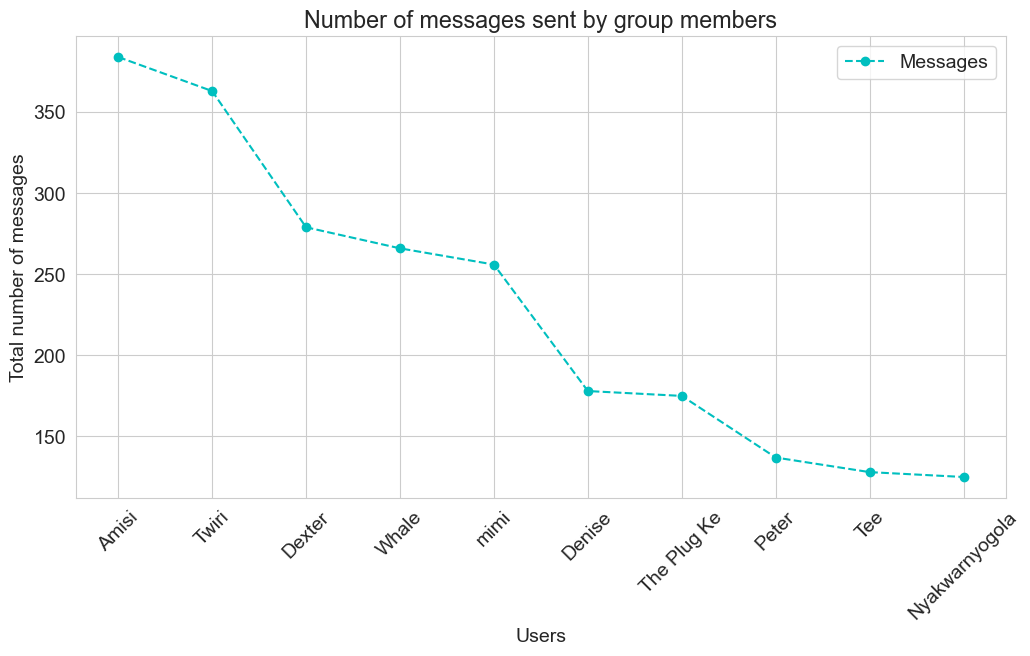

In [43]:
# Improving Default Styles using Seaborn
sns.set_style("whitegrid")

# Increasing the figure size
plt.figure(figsize=(12, 6))

# Better implementation using the `fmt` argument
plt.plot(top10df.initials, top10df.message, 'o--c')

# Labels and Title
plt.xlabel('Users')
plt.ylabel('Total number of messages')

plt.title("Number of messages sent by group members")
plt.legend(['Messages']);
plt.xticks(rotation=45)
plt.show()

# Saving the plots
plt.savefig('msg_plots.svg', format = 'svg')

#### Plotting a bar chart and line graph together.

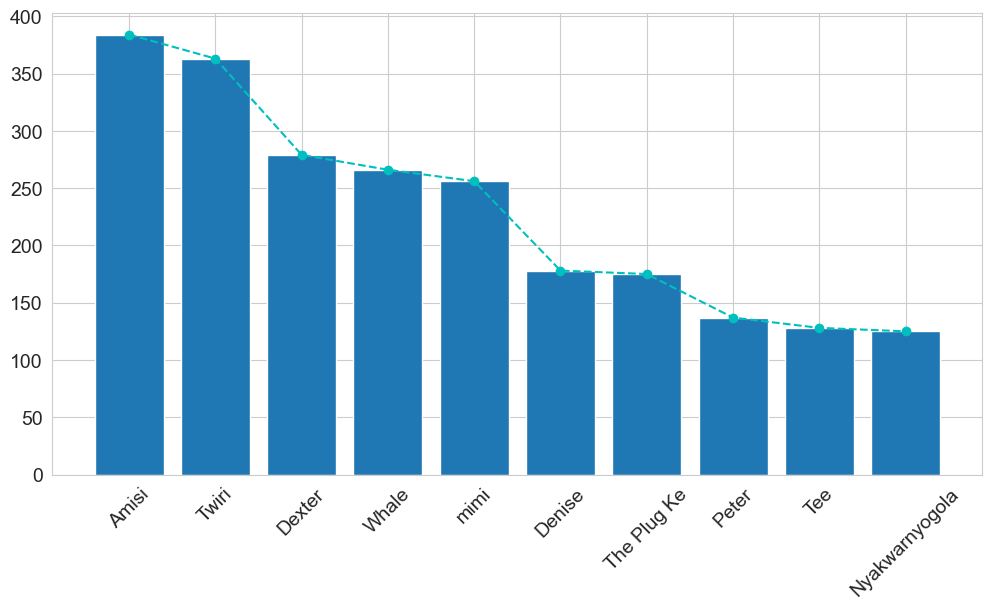

In [158]:
# Improving default style using Seaborn
sns.set_style("whitegrid")

# Increasing the figure size
plt.figure(figsize=(12, 6))

plt.bar(top10df.initials, top10df.message)  # bar chart
plt.plot(top10df.initials, top10df.message, 'o--c') # line chart
plt.xticks(rotation=45)
plt.show()

# Saving the plots
plt.savefig('msg_plots2.svg', format = 'svg')

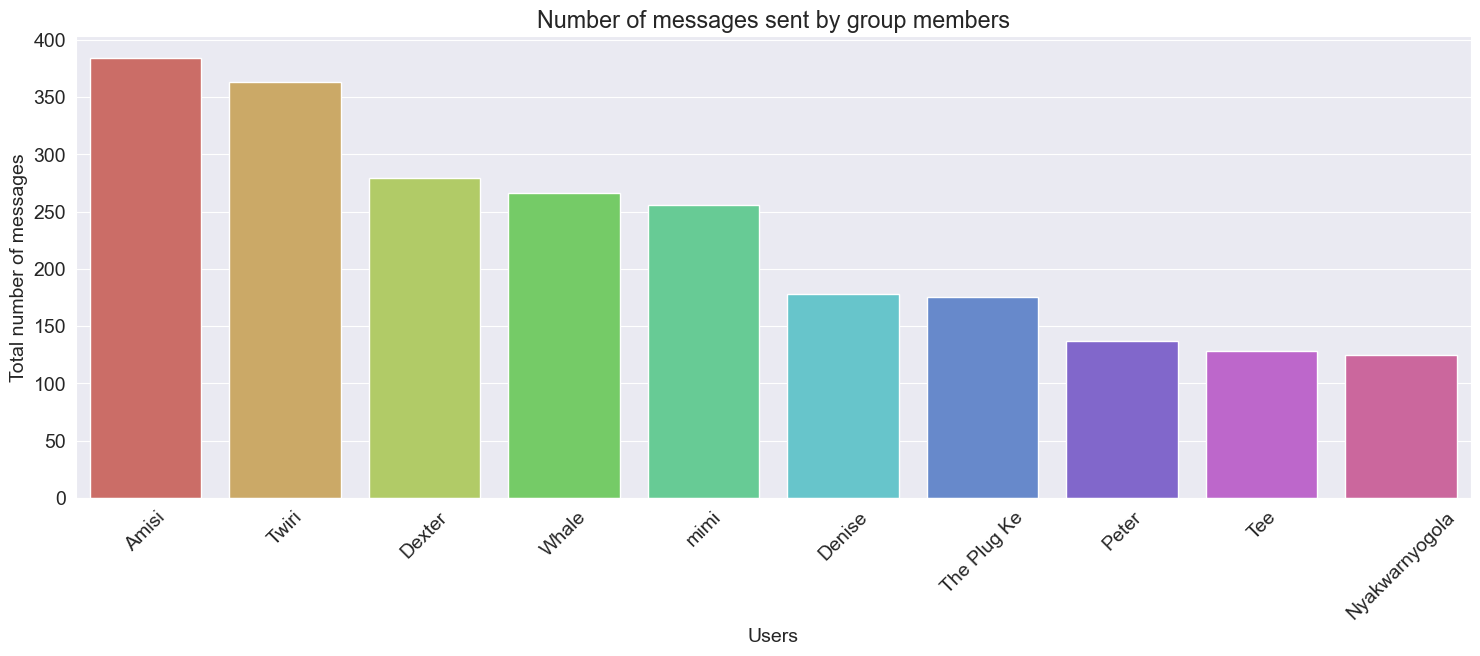

In [160]:
# Beautifying default styles using Seaborn
sns.set_style("darkgrid")
sns.barplot(x='initials', y='message', data=top10df, palette='hls');

plt.xlabel('Users')
plt.ylabel('Total number of messages')
plt.title("Number of messages sent by group members")
plt.xticks(rotation=45)
plt.show()

# Saving the plots
plt.savefig('msg_plots3.svg', format = 'svg')

# Note

I'll give each character a distinct color as practically every plot will compare them to one another, making it simple to recognize them across several stories. 

 - I had the option of using Seaborn's color scheme, but:  Seaborn uses its own default color scheme, however I wanted a character's color to be constant throughout the story;   I also got my color palette from https://coolors.co/ because I wanted to experiment with different hues.

 - I write a function that, given a list of names, rearranges colors to correspond with the plot's ordering.  This function returns a rearranged list of colors after receiving the sorted names as input.  In a seaborn plotting function, this list must be provided into the `pallete` input.

## Defining a function to tackle the problem.

In order to keep each character's color consistent over all plots, I'm writing the following function.  This is supplied to the function that will rearrange colors in a specific order because the order will change based on the plot. This way, the color of a particular person will always be the same regardless of the plot.  This will make the numerous graphs I'll be plotting more readable and consistent.


In [48]:
def colors_of_certain_order(names_in_certain_order):
    '''Users color remains the same, no matter the plot'''

    order = list(names_in_certain_order)
    return_list = []

    for name in order:
        return_list.append(color_dict[name])

    return return_list

### Now, we have a really nice set of colours for each person, with which we can visualize using `sns.palplot`.

In [50]:
colors = ['#577590', '#F8961E', '#FDC500', '#003F88', '#F94144', '#F9C74F', '#90BE6D', '#43AA8B', '#F3722C', '#6D597A']
sns.palplot(colors)

names = top10df.initials

color_dict = {}
for name, color in zip(names, colors):
    color_dict[name] = color
color_dict

{'Amisi': '#577590',
 'Twiri': '#F8961E',
 'Dexter': '#FDC500',
 'Whale': '#003F88',
 'mimi': '#F94144',
 'Denise': '#F9C74F',
 'The Plug Ke': '#90BE6D',
 'Peter': '#43AA8B',
 'Tee': '#F3722C',
 'Nyakwarnyogola': '#6D597A'}

## Now, finding the average message length of the 10 most active users of the group.

In [52]:
# Adding another column for message length; using the apply method;
df2['message_length'] = df2['message'].apply(lambda x: len(x))      

# Creating another dataframe for average length per user;
avg_msg_lengths = df2.groupby('user')['message_length'].mean().reset_index().sort_values(by = 'message_length', ascending = False)

# Creating helper columns;
top10df['avg_message_length'] = [0] * 10
i, j = 0, 0
while i < 10:
    if top10df['user'][i] == avg_msg_lengths['user'][j]:
        top10df['avg_message_length'][i] = avg_msg_lengths['message_length'][j]
        i += 1
        j = -1
    j += 1

# Sorting the average message lengths of the same to 10 active users;
top10df_msg = top10df.sort_values(by = "avg_message_length", ascending=False)

## Now, we will be plotting most sent messages and respective average message lengths simultaneously, to see some interesting results.
- Plotting multiple charts in a grid
    - Matplotlib and Seaborn also support plotting multiple charts in a grid, using `plt.subplots`, which returns a set of axes that can be used for plotting.

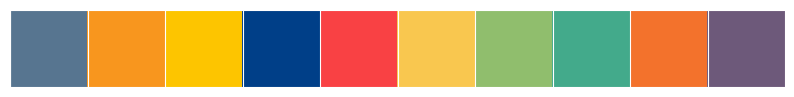

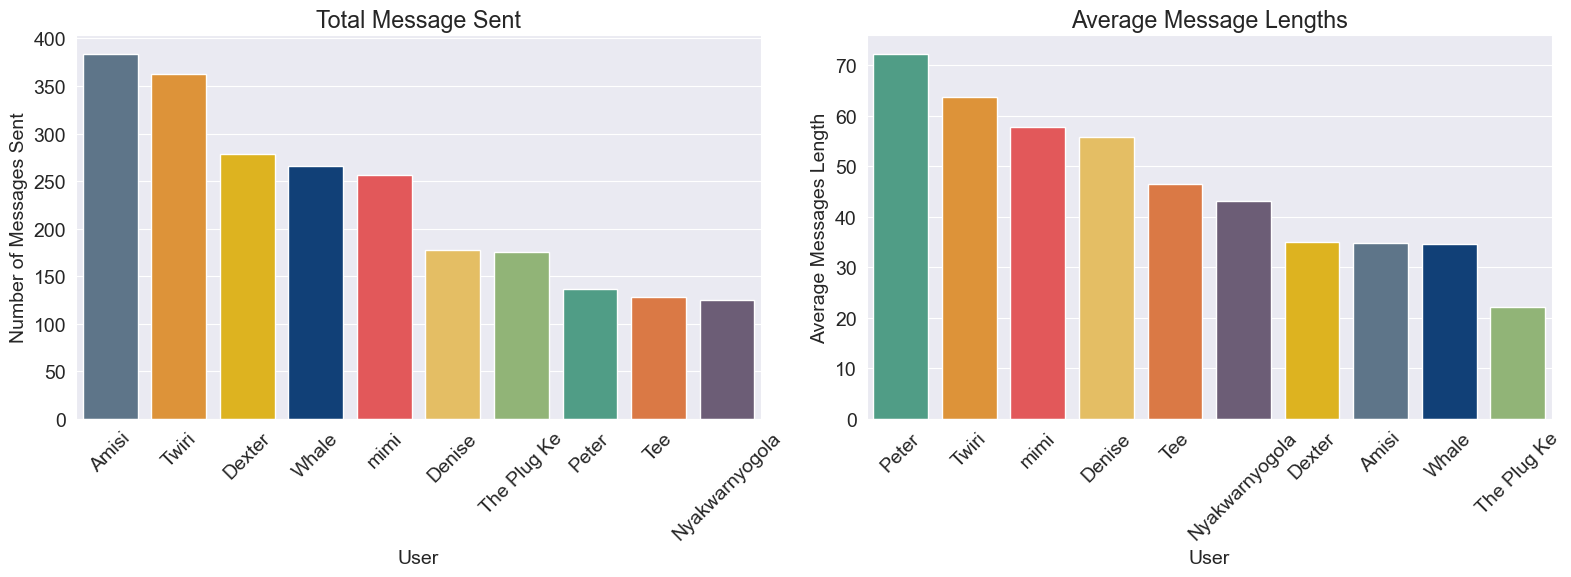

In [54]:
# Plotting multiple charts in a grid
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set_style("darkgrid")

# Plot 1: Countplot of total messegaes sent
sns.barplot(x='initials', y='message', data=top10df, ax = axes[0], palette = colors_of_certain_order(top10df.initials));

axes[0].set_title('Total Message Sent')
axes[0].set_xlabel('User')
axes[0].set_ylabel('Number of Messages Sent')
axes[0].tick_params(axis='x', rotation=45)


# Plot 2: Barplot of those top 10 active users' average message per lengths
sns.barplot(x='initials', y='avg_message_length', data=top10df_msg, ax=axes[1], palette = colors_of_certain_order(top10df_msg.initials))

axes[1].set_title('Average Message Lengths')
axes[1].set_xlabel('User');
axes[1].set_ylabel('Average Messages Length');
axes[1].tick_params(axis='x', rotation=45)


# Saving the plots
plt.savefig('top10_msg_plots_diff.svg', format = 'svg')

# Layout for better spacing and rendering
plt.tight_layout()

plt.show()

### Plots like this are fascinating to see side by side because of the twist:

 Interestingly Amisi, who sent the most texts (more than 350), had the third-shortest average message length.  This indicates that the sender sends a large number of broken WhatsApp messages at once. 

 We may observe that Twiri sends a lot of messages, but they are comparatively longer.

 Peter sends comparatively fewer messages, but they are longer.

### Sometimes things aren't as they seem.

# 4. Top 10 users most sent media 

- The exported chats were exported without any media files. Any message that contained media was indicated with `‘<Media Omitted> ’`. 

### Pre-processing

**We can use this to filter out and see who sends the most media.**

In [57]:
# Using `groupby`, `count` and `sort_values` attributes.
top10media = (
    df[df.message == '<Media omitted> ']
    .groupby('user')
    .count()
    .sort_values(by="message", ascending=False)
    .head(10)
    .rename(columns={"message": "media_sent"})
    .reset_index()[['user', 'media_sent']]
)

def get_initials(name):
    parts = name.split()
    if len(parts) >= 2:
        return parts[0][0] + parts[1][0]
    else:
        return parts[0][0]


top10media['initials'] = top10media['user'].apply(get_initials)

custom_names = {
    0: "Amisi",
    1: "Twiri",
    2: "Dexter",
    3: "Whale",
    4: "Sami",
    5: "Denise",
    6: "The Plug Ke",
    7: "Peter",
    8: "Tee",
    9: "Nyakwarnyogola",
}
for idx, name in custom_names.items():
    if idx < len(top10media):
        top10media.loc[idx, 'initials'] = name

print(top10media)
  

              user  media_sent        initials
0  +254 713 559966          68           Amisi
1  +254 704 776866          62           Twiri
2  +254 111 439103          58          Dexter
3  +254 758 685974          48           Whale
4  +254 794 625960          43            Sami
5             Sami          37          Denise
6  +254 700 772176          26     The Plug Ke
7  +254 707 265704          22           Peter
8  +254 745 508841          21             Tee
9  +254 701 970415          18  Nyakwarnyogola


### Visualization using different Seaborn's Color Palettes
- [Seaborn References](http://seaborn.pydata.org/tutorial/color_palettes.html#using-circular-color-systems)
- [Seaborn's Different Colors](https://medium.com/@andykashyap/top-5-tricks-to-make-plots-look-better-9f6e687c1e08)
- [Seaborn's Color Visualization](https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/)

###### QUICK HACK
- to get **all possible Seaborn's color palettes**:
    - Just put a random input `palette="xyz"`
    - It will then show an error, showing all possible palettes you can try out from!

### Which user sends the most media?

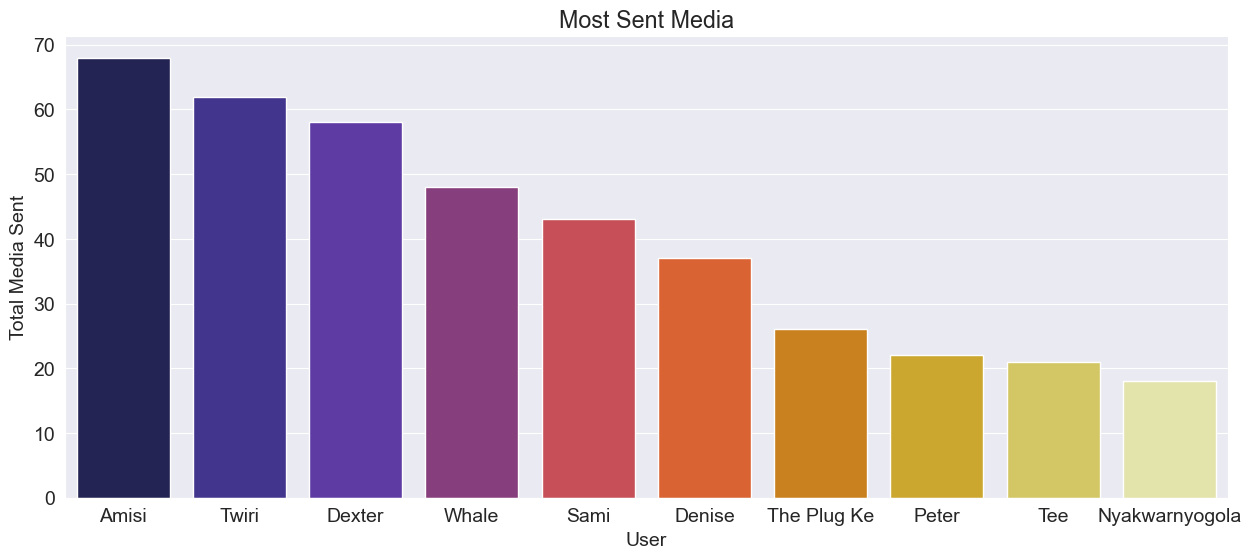

In [205]:
# Increasing the figure size
plt.figure(figsize=(15, 6))

# Beautifying default styles using Seaborn
sns.set_style("darkgrid")

# Plotting a bar graph
sns.barplot(x='initials', y='media_sent', data=top10media, palette="CMRmap");

plt.title('Most Sent Media')
plt.xlabel('User')
plt.ylabel('Total Media Sent');

plt.show()

# Saving the plots
plt.savefig('top10media_svg', format = 'svg')

# 5. Top 10 most used Emojis

- Will be using the `emoji` module, that was imported earlier.

In [62]:
emoji_ctr = Counter()
emojis_list = emoji.EMOJI_DATA.keys()
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in df.iterrows():
    emojis_found = r.findall(row["message"])
    for emoji_found in emojis_found:
        emoji_ctr[emoji_found] += 1

#### Will create another helper column using `emoji.demojize("<emoji>")`, since emojis will not rendered.

In [64]:
top10emojis = pd.DataFrame()
top10emojis['emoji'] = [''] * 10
top10emojis['emoji_count'] = [0] * 10
top10emojis['emoji_description'] = [''] * 10

i = 0
for item in emoji_ctr.most_common(10):
    description = emoji.demojize(item[0])[1:-1]
    top10emojis.emoji[i] = item[0]
    top10emojis.emoji_count[i] = int(item[1])
    top10emojis.emoji_description[i] = description
    i += 1

top10emojis

,emoji,emoji_count,emoji_description
0,😂,1169,face_with_tears_of_joy
1,😹,150,cat_with_tears_of_joy
2,💀,114,skull
3,💔,71,broken_heart
4,📌,67,pushpin
5,😅,66,grinning_face_with_sweat
6,🫴,54,palm_up_hand
7,🤣,52,rolling_on_the_floor_laughing
8,🥲,46,smiling_face_with_tear
9,🔥,33,fire


### Visualizing the most used Emoji in the chat?

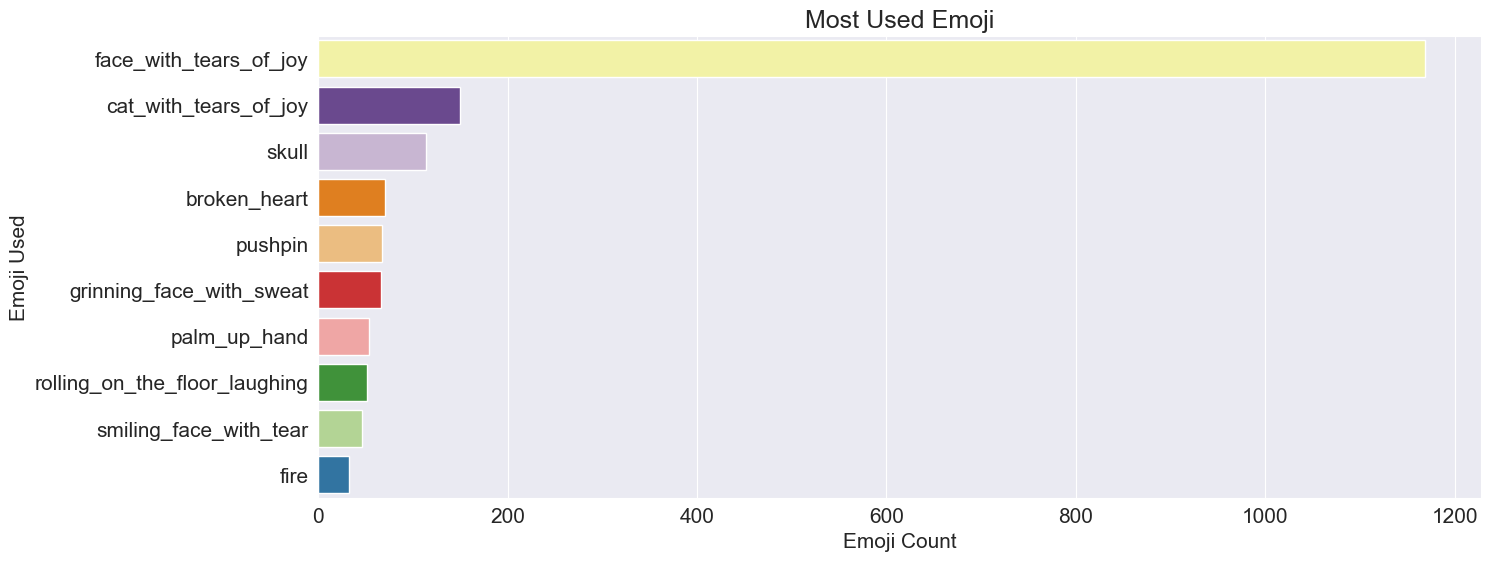

In [66]:
# Increase figure size
plt.figure(figsize=(15, 6))

# Better Readability
import matplotlib
matplotlib.rcParams['font.size'] = 15

# Beautifying default styles using Seaborn
sns.set_style("darkgrid")

# Plotting
sns.barplot(x='emoji_count', y='emoji_description', data=top10emojis, palette = "Paired_r")

plt.title('Most Used Emoji')
plt.xlabel('Emoji Count')
plt.ylabel('Emoji Used');

plt.show()

# Save the plots
plt.savefig('top10emoji.svg', format = 'svg')

#### Not that it is worth anything, but "😂" beats everyone by a huge margin!

# 6. Most active days, most active hours, most active months.

### Pre-processing

In [70]:
df3 = df.copy()
df3['message_count'] = [1] * df.shape[0]
df3['hour'] = df3['date_time'].apply(lambda x: x.hour)
grouped_by_time = df3.groupby('hour').sum(numeric_only=True).reset_index().sort_values(by = 'hour')

### Which hour of the day are most messages exchanged?

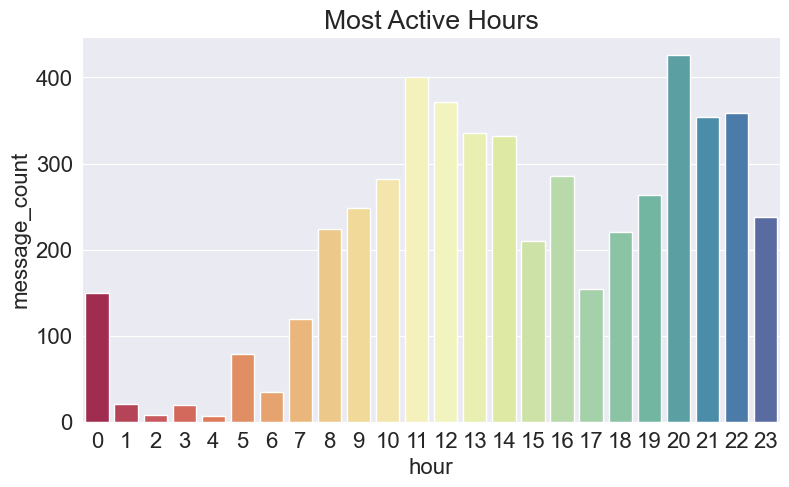

In [72]:
# Better Readability
import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (20, 8)

# Beautifying default styles using Seaborn
sns.set_style("darkgrid")

# Plot: grouped by hour
sns.barplot(x='hour', y='message_count', data=grouped_by_time, palette='Spectral')
plt.title('Most Active Hours');

# Save the plots
plt.savefig('most_active_hours.svg', format = 'svg')

plt.show()

#### Intrestingly, the group is most active around midnight, followed by afternoon.

### Pre-processing weekdays and months

In [75]:
# Specific `order` to be printed in
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Grouping by day
grouped_by_day = df3.groupby('day').sum(numeric_only=True).reset_index()[['day', 'message_count']]

# Specific `order` to be printed
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Grouping by month
grouped_by_month = df3.groupby('month').sum(numeric_only=True).reset_index()[['month', 'message_count']]


## Visualization
### Now, we will be plotting *grouped by day* and respective *group by month* simultaneously, to see some interesting results.
- Using `plt.subplots` to plot multiple charts in a grid.

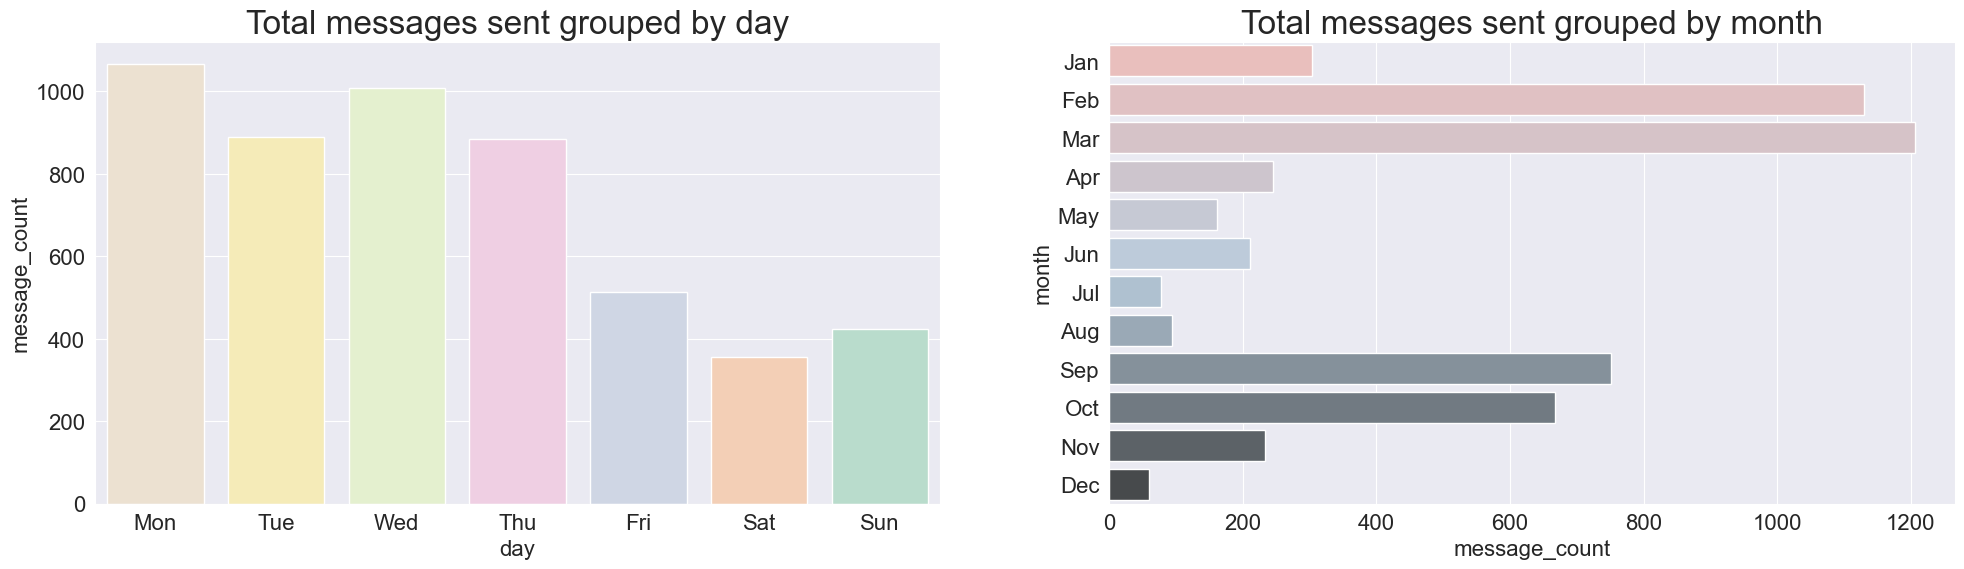

In [77]:
fig, axs = plt.subplots(1, 2, figsize = (24, 6))

# Better Readability
import matplotlib
matplotlib.rcParams['font.size'] = 20

# Beautifying default styles using Seaborn
sns.set_style("darkgrid")

# Plot 1: Messages grouped by weekdays
sns.barplot(x='day', y='message_count', data=grouped_by_day, order=days, ax = axs[0], palette='Pastel2_r')
axs[0].set_title('Total messages sent grouped by day')

# Plt 2: Messages grouped by months
sns.barplot(y='month', x='message_count', data=grouped_by_month, order = months, ax = axs[1], palette='Pastel1_d')
axs[1].set_title('Total messages sent grouped by month')
plt.show()

# save the plots
plt.savefig('days_and_months.svg', format = 'svg')



##### The group is most active on Mondays, and least active on Saturday (probably guys are out partying!)
##### It has been recently very active, in Febraury, March, September and October mid semesters.
##### Least active months are between May and August, this is when we're on Summer holidays

### Now, we will plot a heatmap, combining the above to bar plots, for a better understanding! 

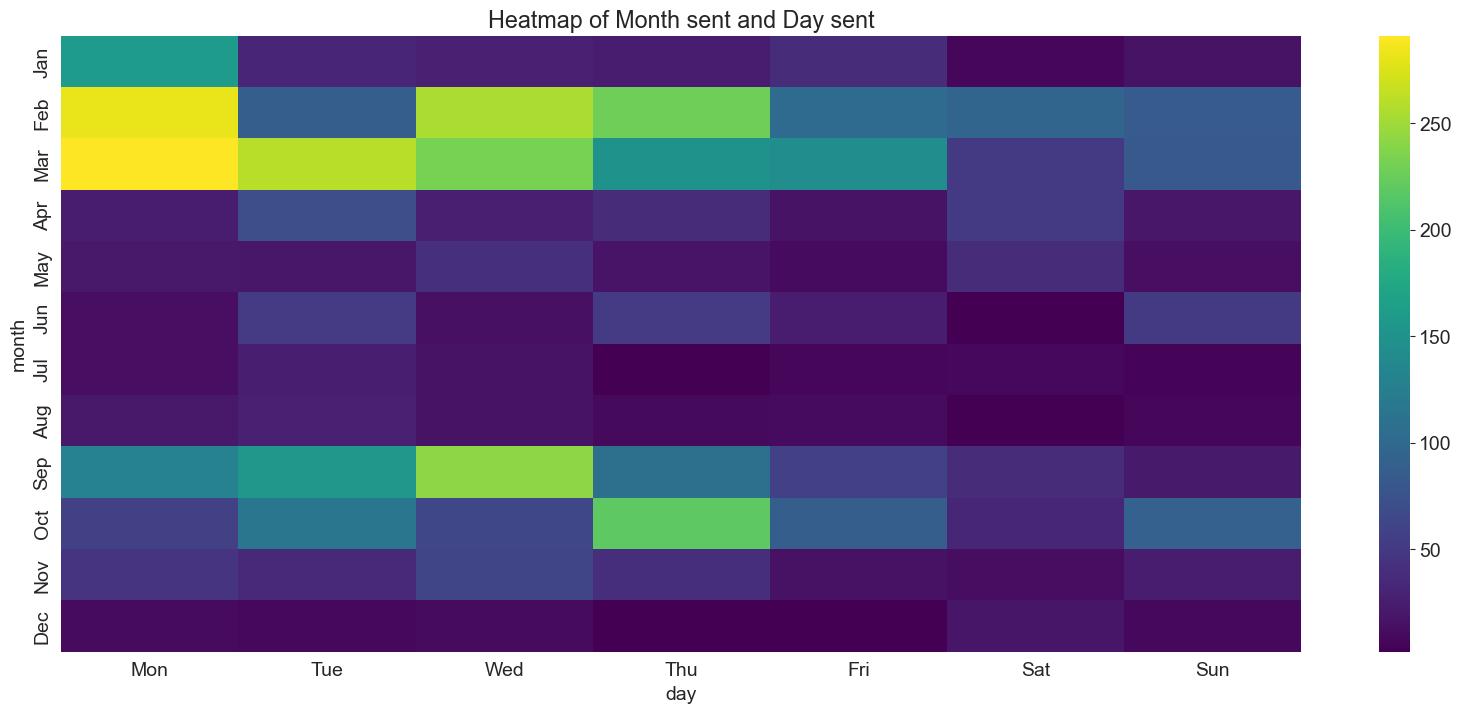

In [80]:
# Better Readability
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (18, 6)

# Beautifying default styles using Seaborn
sns.set_style("darkgrid")

# Preprocessing by month and day
grouped_by_month_and_day = df3.groupby(['month', 'day']).sum(numeric_only=True).reset_index()[['month', 'day', 'message_count']]

# Create a pivot table
pt = grouped_by_month_and_day.pivot_table(index = 'month', columns = 'day', values = 'message_count').reindex(index = months, columns = days)

# Plot: heatmap
sns.heatmap(pt, cmap = 'viridis');
plt.title('Heatmap of Month sent and Day sent');
plt.show()

# Save the plots
plt.savefig('month_day_heatmap.svg', format = 'svg')

# Inferences
- The group is more active on weekdays, throughout the months that we're in for semesters.
- This gives a combined analysis, which is really helpful in real-time projects.

# Most used words in the chat.
### Finally, I will be ending with the most used words, using `WordCloud` module in Python.

In [83]:
comment_words = ' '

# stopwords --> Words to be avoided while forming the WordCloud,
# removed group_notifications like 'joined', 'deleted';
# removed really common words like "yeah" and "okay".
stopwords = STOPWORDS.update(['group', 'link', 'invite', 'joined', 'message', 'deleted', 'yeah', 'hai', 'yes', 'okay', 'ok', 'will', 'use', 'using', 'one', 'know', 'guy', 'group', 'media', 'omitted'])

# Iterate through the DataFrame
for val in df3.message.values:
    # typecast each val to string
    val = str(val)

    # Split the value
    tokens = val.split()

    # convert each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    for words in tokens:
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 600, height = 600,
                     background_color = 'white',
                     stopwords = stopwords,
                     min_font_size = 8).generate(comment_words)

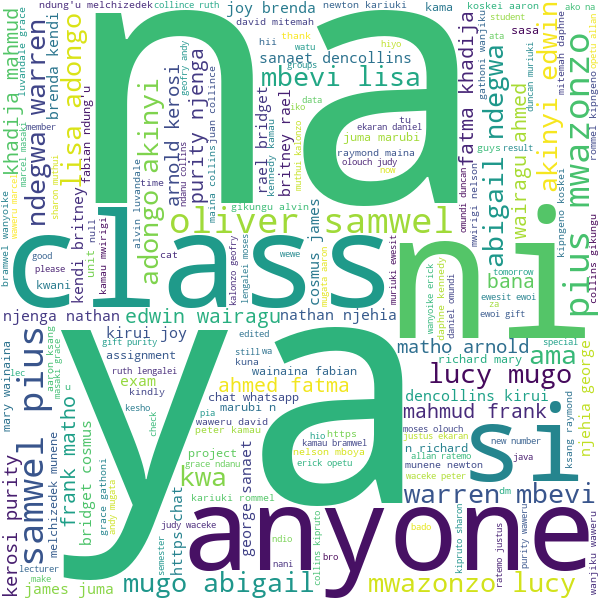

In [164]:
# Saving the plots
plt.savefig('most_used_words.svg', format = 'svg')

wordcloud.to_image()

The recursive nature of gathering data on the members present during that semester is the reason why its members' official names show up in WordCloud's most used words.  Their names appear as the most used words since they typically use the copy and paste feature to make the list.

### Sentiment Analysis

In [172]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity
    

df4 = df.copy()

df4['polarity'] = df4['message'].apply(get_sentiment)
df4['sentiment'] = df4['polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

### Plot Sentiment Distribution

<Figure size 1800x600 with 0 Axes>

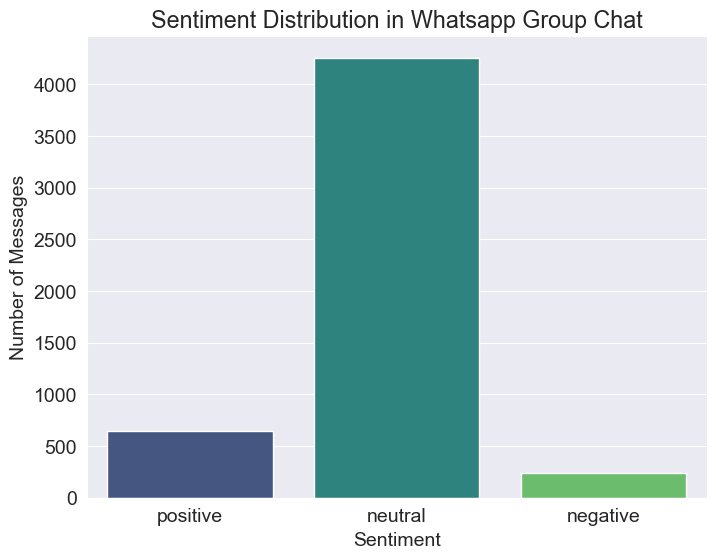

In [174]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df4, palette='viridis')
plt.title('Sentiment Distribution in Whatsapp Group Chat')
plt.xlabel('Sentiment')
plt.ylabel('Number of Messages')
plt.show()

# Saving the plots
plt.savefig('sentiment_distribution.svg', format = 'svg')

<Figure size 1800x600 with 0 Axes>

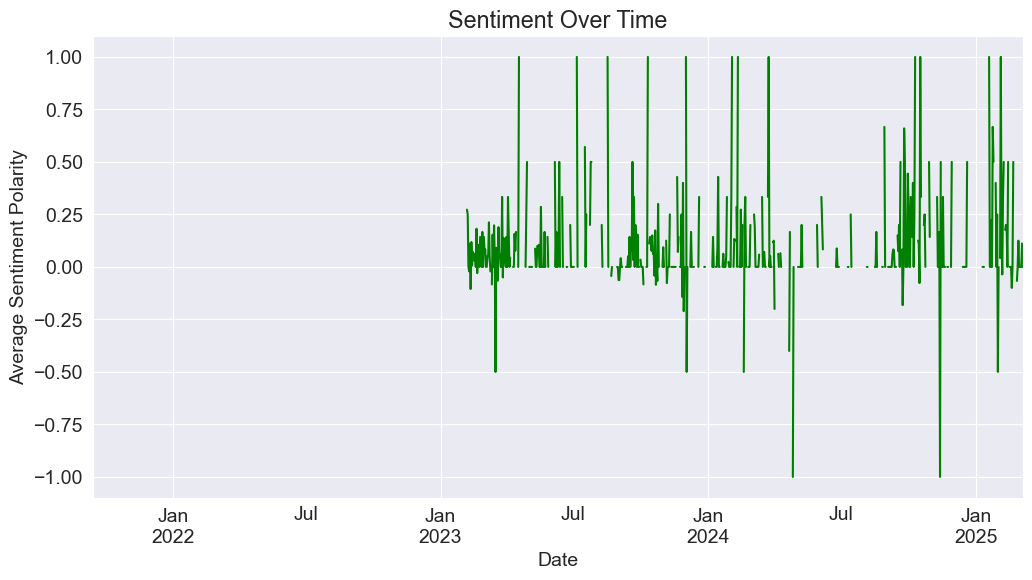

In [178]:
sentiment_mapping = {
    'positive': 1,
    'neutral': 0,
    'negative': -1
}
df4['sentiment_numeric'] = df4['sentiment'].map(sentiment_mapping)

df4['date_time'] = pd.to_datetime(df4['date_time'], format='%d/%m/%Y, %I:%M %p')
df4.set_index('date_time', inplace=True)

plt.figure(figsize=(12, 6))
df4['sentiment_numeric'].resample('D').mean().plot(kind='line', color='green')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Polarity')
plt.show()

# Saving the plots
plt.savefig('sentiment_over_time.svg', format = 'svg')

### Swear Word Detection

In [181]:
swear_words = ["fuck", 'shit', 'dumb']

def detect_swear_words(text):
    for word in swear_words:
        if word in text.lower():
            return True
    return False

df4['contains_swear'] = df4['message'].apply(detect_swear_words)

swear_count = df4['contains_swear'].sum()
print(f"Number of messages containing swear words: {swear_count}")

Number of messages containing swear words: 11


### VADER for Sentiment Analysis
VADER (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool specifically designed for social media text. It provides a more nuanced sentiment score (positive, negative, neutral, and compound).

In [184]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

df4['vader_sentiment'] = df4['message'].apply(get_vader_sentiment)
df4['vader_sentiment_label'] = df4['vader_sentiment'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Visualize VADER Sentiment Analysis

##### VADER Sentiment Visualization

<Figure size 1800x600 with 0 Axes>

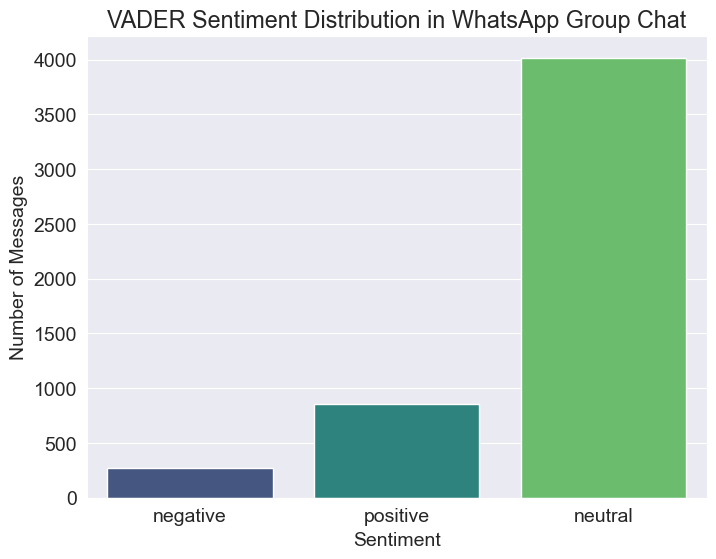

In [188]:
# Plot VADER sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='vader_sentiment_label', data=df4, palette='viridis')
plt.title('VADER Sentiment Distribution in WhatsApp Group Chat')
plt.xlabel('Sentiment')
plt.ylabel('Number of Messages')
plt.show()

# Saving the plots
plt.savefig('vader_sentiment_distribution.svg', format = 'svg')

#### Plot VADER sentiment over time

<Figure size 1800x600 with 0 Axes>

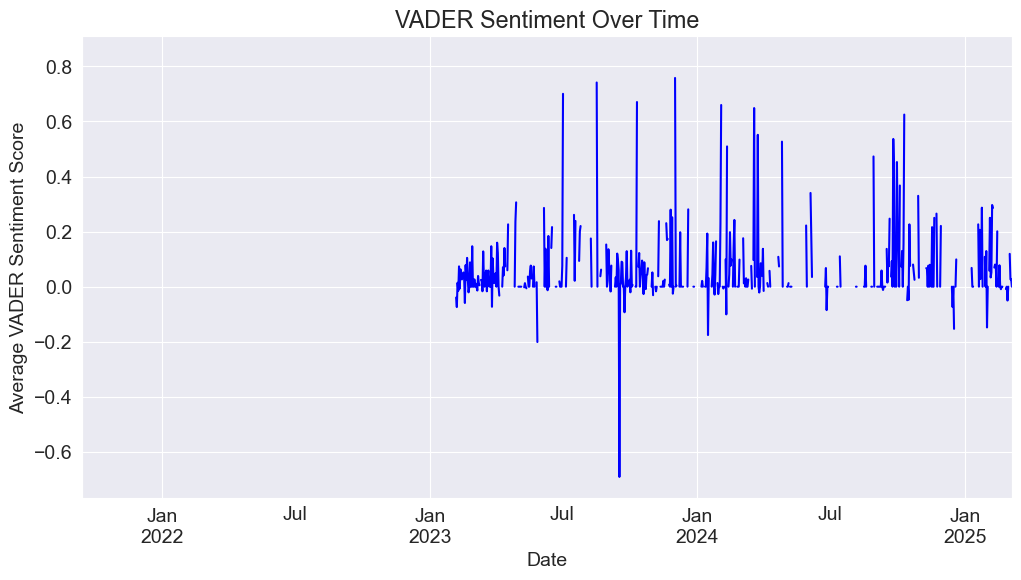

In [191]:
plt.figure(figsize=(12, 6))
df4['vader_sentiment'].resample('D').mean().plot(kind='line', color='blue')
plt.title('VADER Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average VADER Sentiment Score')
plt.show()

# Saving the plots
plt.savefig('vader_sentiment_over_time.svg', format = 'svg')

#### Compare TextBlob and VADER Sentiment

In [194]:
# Compare TextBlob and VADER sentiment labels
comparison = df4[['sentiment', 'vader_sentiment_label']]
comparison['agreement'] = comparison['sentiment'] == comparison['vader_sentiment_label']

# Calculate agreement rate
agreement_rate = comparison['agreement'].mean()
print(f"Agreement rate between TextBlob and VADER: {agreement_rate:.2%}")

# Display disagreement cases
disagreement = comparison[comparison['agreement'] == False]
print(disagreement.head())

Agreement rate between TextBlob and VADER: 84.80%
                    sentiment vader_sentiment_label  agreement
date_time                                                     
2023-02-06 19:44:00  positive              negative      False
2021-09-13 11:18:00   neutral              positive      False
2023-02-06 20:24:00  positive              negative      False
2023-02-07 20:53:00   neutral              negative      False
2023-02-07 23:03:00  positive               neutral      False


#### Swear Word Usage

<Figure size 1800x600 with 0 Axes>

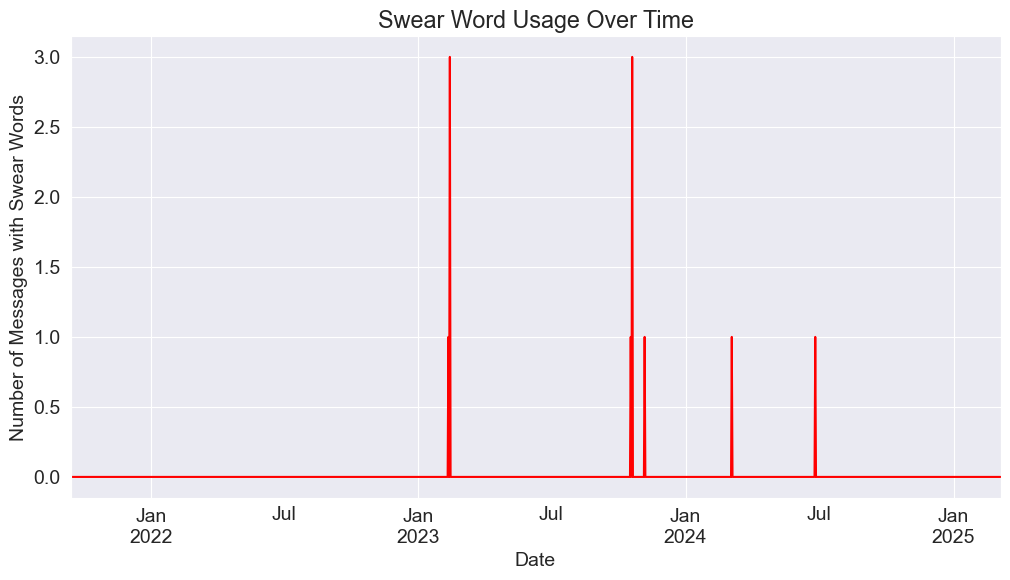

user
+254 790 153107    5
jeff               2
+254 700 772176    1
+254 700 440330    1
+254 758 685974    1
                  ..
+254 732 827041    0
+254 740 105658    0
+254 740 345980    0
+254 741 491714    0
+254 745 508841    0
Name: contains_swear, Length: 179, dtype: int64


In [197]:
# Plot swear word usage over time
plt.figure(figsize=(12, 6))
df4['contains_swear'].resample('D').sum().plot(kind='line', color='red')
plt.title('Swear Word Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Messages with Swear Words')
plt.show()

# Analyze swear word usage by user
swear_by_user = df4.groupby('user')['contains_swear'].sum().sort_values(ascending=False)
print(swear_by_user)

# Saving the plots
plt.savefig('swear_words_over_time.svg', format = 'svg')

# Conclusion
### That's it from my end! I hope you enjoyed a lot!

# *Where to go from here?*

- Instagram Data Analysis 
- Play Store Data Analysis
- Exploring more datasets! It is *never-ending*, as there can be ***Infinite Stories with Data***!
- Once, done with enough Data Analysis, try making Datasets, scraping Data from websites and creating Interesting Datasets! 